# Food Demand Project : Team E

## Topic: Tanzania

## Goals:

## Table of Contents: 
* [(A) Choice of a population, with supporting expenditure data](#population)
* [(B) Nutritional content of different foods](#nutrition)
* [(B) Nutritional adequacy of diet](#adequacy)
* [(A) Estimate Demand System](#demand)
* [(C) Counterfactual Experiments](#counterfactual)
* [(A) Presentation](#presentation)

### Setup

In [1]:
!pip install -r requirements.txt

## (A) Choice of a population, with supporting expenditure data <a class="anchor" id="population"></a>

In [2]:
Tanzania_Nutrient_Data = '1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ'
Tanzania_Consumption_Data = '1eRq1SbS5xTBkTzpjxLQLAKQ-j4o5UVp4mhHZSsn8K0M'
Tanzania_Family_Data = '1POplhyd44h-Zt8jMhXa2FGAzS051TPoLa2xMlmvVLU0'
#Tanzania_Family_Data = '1ktmWjhoOtayO96MN6SEjsd3zzocYcsbcnTK_IOo6gMk'

In [3]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

x = read_sheets(Tanzania_Family_Data,sheet='Expenditures')
# x.columns.name = 'j'
# x = x.astype({'Wheat flour': 'float64', 'Citrus fruits (oranges, lemon, tangarines, etc.)': 'float64'})
                 
# Change 'Uganda' to key of your own sheet in Sheets, above
d = read_sheets(Tanzania_Family_Data,sheet="HH Characteristics")
d.columns.name = 'k'

# x may have duplicate columns
# x = x.groupby('j').sum()
x = x.pivot_table(values='value_purchase', index=['i','t','m'], columns='j', aggfunc='first').reset_index()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))

d.set_index(['i','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [4]:
d.head()

k                         Females 00-03  Females 04-08  Females 09-13  \
i t       m                                                             
1 2012-13 Mainland Rural            0.0            0.0            0.0   
  2014-15 Mainland Rural            0.0            0.0            0.0   
2 2014-15 Mainland Rural            0.0            0.0            0.0   
4 2012-13 Mainland Rural            1.0            1.0            0.0   
  2014-15 Mainland Rural            0.0            2.0            0.0   

k                         Females 14-18  Females 19-30  Females 31-50  \
i t       m                                                             
1 2012-13 Mainland Rural            0.0            0.0            0.0   
  2014-15 Mainland Rural            0.0            0.0            0.0   
2 2014-15 Mainland Rural            0.0            1.0            0.0   
4 2012-13 Mainland Rural            0.0            1.0            0.0   
  2014-15 Mainland Rural            0.0            1.0            0.0   

k                         Females 51-99  Males 00-03  Males 04-08  \
i t       m                                                         
1 2012-13 Mainland Rural            1.0          0.0          0.0   
  2014-15 Mainland Rural            1.0          0.0          0.0   
2 2014-15 Mainland Rural            0.0          1.0          0.0   
4 2012-13 Mainland Rural            0.0          0.0          0.0   
  2014-15 Mainland Rural            0.0          1.0          0.0   

k                         Males 09-13  Males 14-18  Males 19-30  Males 31-50  \
i t       m                                                                    
1 2012-13 Mainland Rural          0.0          0.0          2.0          0.0   
  2014-15 Mainland Rural          0.0          0.0          1.0          1.0   
2 2014-15 Mainland Rural          0.0          0.0          1.0          0.0   
4 2012-13 Mainland Rural          0.0          0.0          0.0          1.0   
  2014-15 Mainland Rural          0.0          0.0          0.0          1.0   

k                         Males 51-99  log HSize  Rural  
i t       m                                              
1 2012-13 Mainland Rural          1.0   1.386294    1.0  
  2014-15 Mainland Rural          1.0   1.386294    1.0  
2 2014-15 Mainland Rural          0.0   1.098612    1.0  
4 2012-13 Mainland Rural          0.0   1.386294    1.0  
  2014-15 Mainland Rural          0.0   1.609438    1.0

In [5]:
y.head()

j                             Beef  Bottled beer  Bread  Butter  \
i t       m                                                       
1 2008-09 Mainland Rural  7.824046           NaN    NaN     NaN   
  2010-11 Mainland Rural       NaN           NaN    NaN     NaN   
  2012-13 Mainland Rural  7.600902           NaN    NaN     NaN   
  2014-15 Mainland Rural       NaN           NaN    NaN     NaN   
  2019-20 Mainland Rural  7.824046           NaN    NaN     NaN   

j                         Canned milk/milk powder  \
i t       m                                         
1 2008-09 Mainland Rural                      NaN   
  2010-11 Mainland Rural                      NaN   
  2012-13 Mainland Rural                      NaN   
  2014-15 Mainland Rural                      NaN   
  2019-20 Mainland Rural                      NaN   

j                         Canned, dried and wild vegetables  \
i t       m                                                   
1 2008-09 Mainland Rural                                NaN   
  2010-11 Mainland Rural                                NaN   
  2012-13 Mainland Rural                                NaN   
  2014-15 Mainland Rural                                NaN   
  2019-20 Mainland Rural                                NaN   

j                         Cassava dry/flour  Cassava fresh  Chicken  \
i t       m                                                           
1 2008-09 Mainland Rural                NaN            NaN      NaN   
  2010-11 Mainland Rural                NaN            NaN      NaN   
  2012-13 Mainland Rural                NaN            NaN      NaN   
  2014-15 Mainland Rural                NaN            NaN      NaN   
  2019-20 Mainland Rural                NaN            NaN      NaN   

j                         Citrus fruits  ...  Wheat, barley, other grains  \
i t       m                              ...                                
1 2008-09 Mainland Rural            NaN  ...                          NaN   
  2010-11 Mainland Rural            NaN  ...                          NaN   
  2012-13 Mainland Rural            NaN  ...                          NaN   
  2014-15 Mainland Rural            NaN  ...                          NaN   
  2019-20 Mainland Rural            NaN  ...                          NaN   

j                         Wild birds and insects  Wine and spirits  \
i t       m                                                          
1 2008-09 Mainland Rural                     NaN               NaN   
  2010-11 Mainland Rural                     NaN               NaN   
  2012-13 Mainland Rural                     NaN               NaN   
  2014-15 Mainland Rural                     NaN               NaN   
  2019-20 Mainland Rural                     NaN               NaN   

j                         Yams/cocoyams  bread  eggs  salt  sugar  sugarcane  \
i t       m                                                                    
1 2008-09 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   
  2010-11 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   
  2012-13 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   
  2014-15 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   
  2019-20 Mainland Rural            NaN    NaN   NaN   NaN    NaN        NaN   

j                         sweets  
i t       m                       
1 2008-09 Mainland Rural     NaN  
  2010-11 Mainland Rural     NaN  
  2012-13 Mainland Rural     NaN  
  2014-15 Mainland Rural     NaN  
  2019-20 Mainland Rural     NaN  

[5 rows x 67 columns]

In [6]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=30)

Missing dependencies for OracleDemands.


In [7]:
use = y.index.intersection(d.index)
y = y.loc[use,:]
d = d.loc[use,:]

## (B) Nutritional content of different foods <a class="anchor" id="nutrition"></a>
For all the foods we are considering for our population, we will describe their nutritional content, in terms that allow us to compare with recommended daily allowances. We'll be using ____ recommendations, which is better suited for our population.

## (B) Nutritional adequacy of diet<a class="anchor" id="adequacy"></a>
Now that we have the data for our food, we will try to analyze the adequacy of the diets in the population we're studying. What proportion of households consume enough so that members will exceed dietary recommendations? What proportion do not?

## (A) Estimate Demand System<a class="anchor" id="demand"></a>
Estimate a system of demands for different kinds of food. Characterize how consumption varies with household need.

In [8]:
y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [ ]:
print(d.index)

In [ ]:
print(d.index.unique())

In [ ]:
from cfe import Regression

d = d.loc[d.index.unique()]

result = Regression(y=y,d=d)

In [37]:
result.predicted_expenditures()

i                t     m         j                                              
0001-001         2012  Tanzania  Beef including minced sausage                      2644.987702
                                 Bottled/canned soft drinks (soda, juice, water)    1072.476110
                                 Bread                                              1407.364640
                                 Buns, cakes and biscuits                           1255.185336
                                 Cassava dry/flour                                  2919.152897
                                                                                       ...     
905012325008101  2010  Tanzania  Sweet potatoes                                      796.490616
                                 Sweets                                              356.977511
                                 Tea dry                                             275.243638
                                 Wheat, barley grain an

<IPython.core.display.Javascript object>


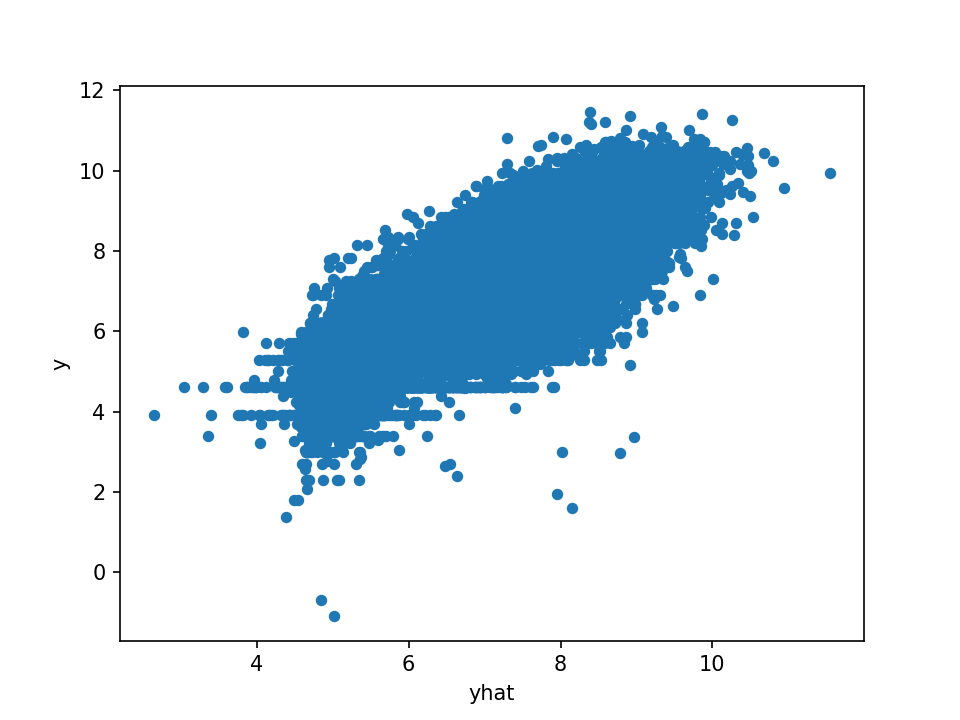

<AxesSubplot:xlabel='yhat', ylabel='y'>

In [38]:
%matplotlib notebook
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

## (C) Counterfactual Experiments<a class="anchor" id="counterfactual"></a>
If everyone's total food expenditures doubled (holding prices fixed)
how would this affect nutrition in the population? What if relative food prices changed?
Think of other counterfactual experiments that might be interesting.

## (A) Presentation<a class="anchor" id="prensentation"></a>